In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.stats import zscore
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
data=pd.read_csv('C:/Users/Lenovo/Pictures/Salary_Data.csv')

data.head(3)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0


In [3]:
data = data.drop('Job Title', axis=1)

In [4]:
data = data.dropna()
data.head(3)

,Age,Gender,Education Level,Years of Experience,Salary
0,32.0,Male,Bachelor's,5.0,90000.0
1,28.0,Female,Master's,3.0,65000.0
2,45.0,Male,PhD,15.0,150000.0


In [5]:
data.reset_index(drop= True , inplace= True )
data.head(3)

,Age,Gender,Education Level,Years of Experience,Salary
0,32.0,Male,Bachelor's,5.0,90000.0
1,28.0,Female,Master's,3.0,65000.0
2,45.0,Male,PhD,15.0,150000.0


In [6]:
data['Gender']=data['Gender'].replace('Female', 0)
data['Gender']=data['Gender'].replace('Male', 1)
data['Gender']=data['Gender'].replace('Other', 2)
data.head(3)

,Age,Gender,Education Level,Years of Experience,Salary
0,32.0,1,Bachelor's,5.0,90000.0
1,28.0,0,Master's,3.0,65000.0
2,45.0,1,PhD,15.0,150000.0


In [7]:
data['Education Level']=data['Education Level'].replace("Bachelor's Degree",  "Bachelor's")
data['Education Level']=data['Education Level'].replace("Master's Degree",  "Master's")
data['Education Level']=data['Education Level'].replace("phD",  "PhD")
data.head(3)

,Age,Gender,Education Level,Years of Experience,Salary
0,32.0,1,Bachelor's,5.0,90000.0
1,28.0,0,Master's,3.0,65000.0
2,45.0,1,PhD,15.0,150000.0


data=data.astype(float)
data

In [8]:
dummie_columns = pd.get_dummies(data['Education Level'])*1
dummie_columns.head(3)

,Bachelor's,High School,Master's,PhD
0,1,0,0,0
1,0,0,1,0
2,0,0,0,1


In [9]:
data = pd.concat([data, dummie_columns], axis=1)

In [10]:
data = data.drop('Education Level', axis=1)
data.head(3)

,Age,Gender,Years of Experience,Salary,Bachelor's,High School,Master's,PhD
0,32.0,1,5.0,90000.0,1,0,0,0
1,28.0,0,3.0,65000.0,0,0,1,0
2,45.0,1,15.0,150000.0,0,0,0,1


In [11]:
data_norm=data.copy()

In [12]:
data_norm = data_norm.dropna()
data_norm.head(3)

,Age,Gender,Years of Experience,Salary,Bachelor's,High School,Master's,PhD
0,32.0,1,5.0,90000.0,1,0,0,0
1,28.0,0,3.0,65000.0,0,0,1,0
2,45.0,1,15.0,150000.0,0,0,0,1


In [13]:
data_norm["Age"] = zscore(data_norm["Age"])
data_norm["Gender"]=zscore(data_norm["Gender"])
data_norm["Bachelor's"] =zscore(data_norm["Bachelor's"])
data_norm["High School"]=zscore(data_norm["High School"])
data_norm["Master's"]=zscore(data_norm["Master's"])
data_norm["PhD"]=zscore(data_norm["PhD"])
data_norm['Years of Experience']=zscore(data_norm['Years of Experience'])
data_norm['Salary']=zscore(data_norm['Salary'])
data_norm.head(3)

,Age,Gender,Years of Experience,Salary,Bachelor's,High School,Master's,PhD
0,-0.213129,0.892906,-0.510769,-0.479849,1.103244,-0.267731,-0.620045,-0.506849
1,-0.738393,-1.101320,-0.840811,-0.953461,-0.906418,-0.267731,1.612785,-0.506849
2,1.493980,0.892906,1.139440,0.656819,-0.906418,-0.267731,-0.620045,1.972973


In [14]:
data_norm=data_norm.astype(float)


In [15]:
#data_norm.dropna()
data_norm.head(3)

,Age,Gender,Years of Experience,Salary,Bachelor's,High School,Master's,PhD
0,-0.213129,0.892906,-0.510769,-0.479849,1.103244,-0.267731,-0.620045,-0.506849
1,-0.738393,-1.101320,-0.840811,-0.953461,-0.906418,-0.267731,1.612785,-0.506849
2,1.493980,0.892906,1.139440,0.656819,-0.906418,-0.267731,-0.620045,1.972973


In [16]:
lg=linkage(data_norm, method='ward', metric='euclidean')
lg

array([[4.03100000e+03, 4.04600000e+03, 0.00000000e+00, 2.00000000e+00],
       [4.06100000e+03, 6.69800000e+03, 0.00000000e+00, 3.00000000e+00],
       [4.07600000e+03, 6.69900000e+03, 0.00000000e+00, 4.00000000e+00],
       ...,
       [1.33810000e+04, 1.33910000e+04, 1.28870081e+02, 3.31800000e+03],
       [1.33890000e+04, 1.33900000e+04, 1.38564813e+02, 3.38000000e+03],
       [1.33920000e+04, 1.33930000e+04, 1.82298725e+02, 6.69800000e+03]])

Вернет матрицу (n-1) * 4, n - число наблюдений Каждая строка - результат слияния очередной пары кластеров с номерами link[[i, 0]] и link[[i, 1]] Новому кластеру присваивается номер n + i link[[i, 2]] - расстояние между кластерами в момент объединения link[[i, 3]] - сколько объектов в получившемся кластере

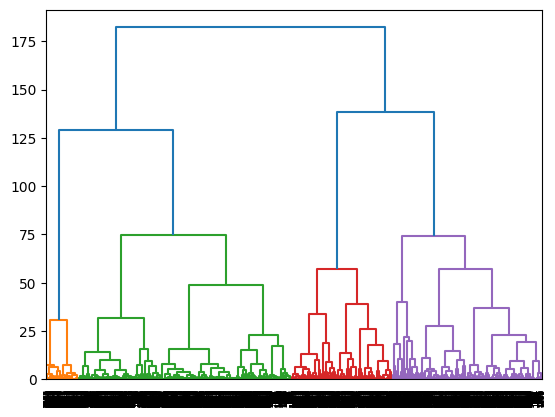

In [17]:
dn = dendrogram(lg)
plt.show()

In [18]:
lg

array([[4.03100000e+03, 4.04600000e+03, 0.00000000e+00, 2.00000000e+00],
       [4.06100000e+03, 6.69800000e+03, 0.00000000e+00, 3.00000000e+00],
       [4.07600000e+03, 6.69900000e+03, 0.00000000e+00, 4.00000000e+00],
       ...,
       [1.33810000e+04, 1.33910000e+04, 1.28870081e+02, 3.31800000e+03],
       [1.33890000e+04, 1.33900000e+04, 1.38564813e+02, 3.38000000e+03],
       [1.33920000e+04, 1.33930000e+04, 1.82298725e+02, 6.69800000e+03]])

In [19]:
fcluster(lg, 4, criterion='maxclust')

array([2, 4, 3, ..., 2, 4, 1], dtype=int32)

In [20]:
data['cluster']= fcluster(lg, 80, criterion='distance') #Добавляем в оригинальную таблицу столбец с номерами кластеров

In [21]:
data.groupby('cluster').mean()

,Age,Gender,Years of Experience,Salary,Bachelor's,High School,Master's,PhD
cluster,,,,,,,,
1,26.312785,0.445205,1.337900,33874.376712,0.000000,1.000000,0.000000,0.0
2,29.567708,0.615972,4.727604,90939.349653,1.000000,0.000000,0.000000,0.0
3,41.154858,0.637692,13.915267,165651.457999,0.000000,0.000000,0.000000,1.0
4,35.895574,0.426156,10.427648,133742.509697,0.070114,0.004973,0.924913,0.0


Кластера 3 и 4  самые большие и по опыту, и  по зарплатам в возрасте 35 и 41 года.в возрасте 26 и 29 уступают и зарплате. Особенно  1 кластер, с более низким опытом. Можно сказать, что опыт и возраст играют решающую роль, пол практически не влияет.

# Метод KMeans/ домашняя работа 10 продолжение.

In [22]:
from sklearn.cluster import KMeans

In [29]:
model = KMeans(n_clusters=4, random_state=32)

In [30]:
model.fit(data_norm)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=32)

In [31]:
model.cluster_centers_

array([[ 0.18629083, -0.25528479,  0.23414676,  0.27247009, -0.90641806,
        -0.26773121,  1.61278494, -0.50684932],
       [-0.53569879,  0.13595848, -0.55612578, -0.46642227,  1.07577992,
        -0.26773121, -0.62004547, -0.47296039],
       [ 1.10719434,  0.11267337,  1.13366146,  1.03540713, -0.72507484,
        -0.24077619, -0.6020024 ,  1.71246639],
       [-0.95995133, -0.21347973, -1.11509209, -1.54311949, -0.90641806,
         3.7350894 , -0.62004547, -0.50684932]])

In [33]:
model.labels_

array([1, 0, 2, ..., 1, 0, 3])

In [34]:
new_items=np.array(data_norm.iloc[len(data_norm)-1,:])

In [39]:
new_items = new_items.reshape(1, 8)

In [40]:
new_items

array([[-1.00102507, -1.10131997, -1.17085257, -1.52179515, -0.90641806,
         3.7350894 , -0.62004547, -0.50684932]])

In [42]:
model.predict(new_items) #  прогнозируй

C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([3])

In [43]:
model.inertia_ # сумма попраных расстояний кластеров

18553.149562729497

In [45]:
K = range(1, 11)
dist = []
for num_of_k in K:
    model = KMeans(n_clusters=num_of_k, random_state=32)
    model.fit(data_norm)
    dist.append(model.inertia_)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\

<Axes: title={'center': 'Зависимость расстояния от кол-ва кластеров'}>

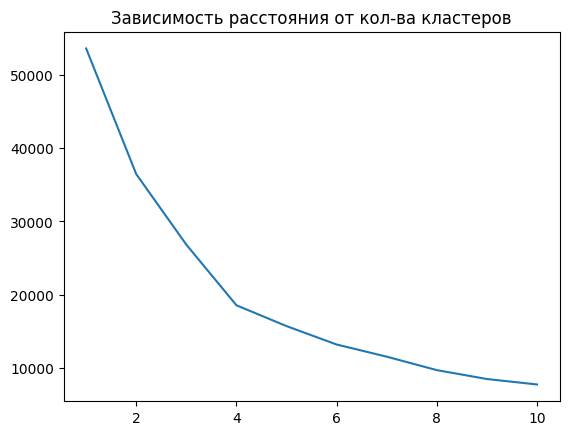

In [47]:
import seaborn as sns
plt.title("Зависимость расстояния от кол-ва кластеров")
sns.lineplot(x=K, y=dist)

In [48]:
model.labels_

array([1, 7, 2, ..., 4, 0, 3])

In [50]:
data['kmeans_cluster']= model.predict(data_norm)


In [51]:
data.groupby('kmeans_cluster').mean().round()

,Age,Gender,Years of Experience,Salary,Bachelor's,High School,Master's,PhD,cluster
kmeans_cluster,,,,,,,,,
0,44.0,1.0,18.0,175601.0,0.0,0.0,1.0,0.0,4.0
1,28.0,1.0,4.0,81285.0,1.0,0.0,0.0,0.0,2.0
2,47.0,1.0,17.0,182413.0,0.0,0.0,0.0,1.0,3.0
3,26.0,0.0,1.0,33874.0,0.0,1.0,0.0,0.0,1.0
4,29.0,0.0,4.0,78324.0,1.0,0.0,0.0,0.0,2.0
5,33.0,1.0,7.0,120393.0,0.0,0.0,1.0,0.0,4.0
6,33.0,0.0,9.0,142782.0,0.0,0.0,0.0,1.0,3.0
7,29.0,0.0,5.0,88278.0,0.0,0.0,1.0,0.0,4.0
8,37.0,0.0,11.0,144899.0,0.0,0.0,1.0,0.0,4.0


In [ ]:
# Получилось 4 кластера. 
в 1 классе самые молодые с низкой зарплатой  женщины и минимальным опытом, с низким образованием.
2 кластер мужчина молодой, женщина ровесница с таким же опытом , но меньшей зарплатой, 
и мужчина  среднего возраста с опытом в 3 раза превышающим и зарплатой выше в 2 раза, образование у всех одинаковое бакалавр.
3 кластер  мужчина и женщина с одинаковым образованием опытом с разницей в 2 раза, зарплата немного разная, возраст с большой разницей.
4 кластер 2 мужчины и 2 женщины,  с ожинаковым образованием, разным опытом и возрастом и не большим различием в зарплате.
Вывод: главные критерии кластеров опыт, возраст, среднезначим пол. Уровень образования  и зарплата  значимо различны  с уровнем кластеров.